# EDA Project Mafia

By - Ayush , Elahe ,Mohamed, Mariana

Imports & Dataset

Core Hypothesis:
“To meet the client's need for privacy and volume, we must target high-utility
(basement) homes in low-density suburbs (Federal Way/Auburn) during the winter
market dull (Jan/Feb), when prices are lowest and competition is minimal.”

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tabulate import tabulate

In [148]:
path = "https://raw.githubusercontent.com/AyushDiyundi/AI-Scientific-Programming/main/KC_housing_data.csv"
df = pd.read_csv(path)

In [149]:
print("Current Columns in df:", df.columns.tolist())

Current Columns in df: ['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country']


In [150]:
# Check the date range
print(f"Data starts on: {df['date'].min()}")
print(f"Data ends on: {df['date'].max()}")

Data starts on: 2014-05-02 00:00:00
Data ends on: 2014-07-10 00:00:00


In [151]:
# Check how many sales happened in each month
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
print(df['month'].value_counts().sort_index())

month
5    1768
6    2179
7     653
Name: count, dtype: int64


In [152]:
# Check for empty date cells
print(f"Missing dates: {df['date'].isnull().sum()}")

Missing dates: 0


In [153]:
# ------------------------------------------------------------------------------
# Mohamed : THE DATA WRANGLER
# Goal: Prepare clean data for the team.
# ------------------------------------------------------------------------------
print("--- [Role A] Data Preparation ---")

# 2. Ensure Date is formatted
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month

# 3. Filter: Basements Only (The Client's Requirement)
df_underground = df[df['sqft_basement'] > 0].copy()

# 4. Filter: Outliers (Cleaning data errors/mansions)
df_clean = df_underground[
    (df_underground['price'] < 2000000) &
    (df_underground['bedrooms'] < 10)
].copy()

print(f"Data Ready. Properties with basements: {len(df_clean)}")

--- [Role A] Data Preparation ---
Data Ready. Properties with basements: 1821



--- [Role B] Location Scouting ---
Target Cluster Identified: WA 98006


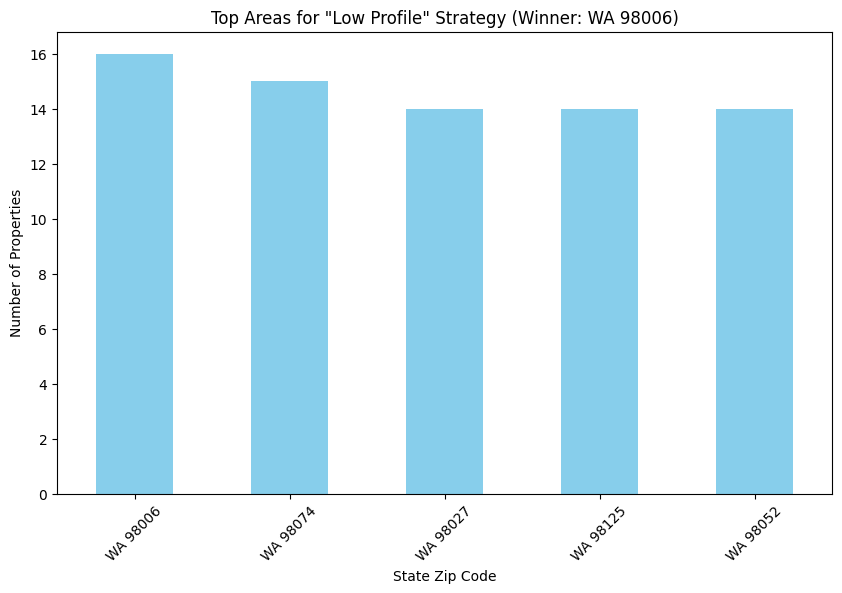

In [154]:
# ------------------------------------------------------------------------------
# Elahe : THE SCOUT
# ------------------------------------------------------------------------------
print("\n--- [Role B] Location Scouting ---")

# 1. Filter for "Low Profile"
# We use 'condition' instead of 'grade' (1 is poor, 5 is excellent)
# We use 'sqft_lot' > 8000 for privacy
potential_buys = df_clean[
    (df_clean['condition'] <= 3) & # Looking for average condition
    (df_clean['sqft_lot'] > 8000) &
    (df_clean['waterfront'] == 0) &
    (df_clean['view'] == 0)
].copy()

# 2. Find the Top Zip Code
top_zips = potential_buys['statezip'].value_counts().head(5)
target_zip = top_zips.idxmax()

target_homes = potential_buys[potential_buys['statezip'] == target_zip].copy()

print(f"Target Cluster Identified: {target_zip}")

#Visual: Bar chart
plt.figure(figsize=(10, 6))
top_zips.plot(kind='bar', color='skyblue')
plt.title(f'Top Areas for "Low Profile" Strategy (Winner: {target_zip})')
plt.xlabel('State Zip Code')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45)
plt.show()


--- [Role C] Timing Analysis ---


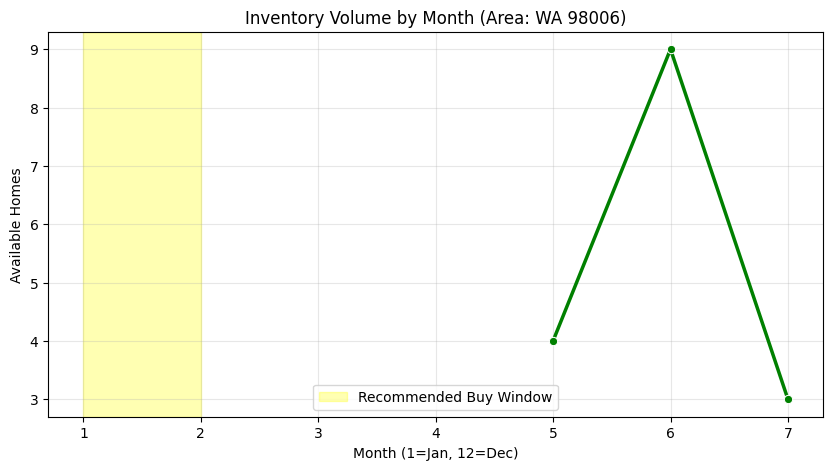

In [155]:
# ------------------------------------------------------------------------------
# Ayush : THE STRATEGIST
# Goal: Analyze the Best Time to Buy (Seasonality).
# ------------------------------------------------------------------------------
print("\n--- [Role C] Timing Analysis ---")

# 1. Analyze Monthly Trends in the Target Area
monthly_stats = target_homes.groupby('month')['price'].agg(['count', 'mean'])

# 2. Visual: Buying Window
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_stats, x=monthly_stats.index, y='count', marker='o', color='green', linewidth=2.5)
plt.title(f'Inventory Volume by Month (Area: {target_zip})')
plt.xlabel('Month (1=Jan, 12=Dec)')
plt.ylabel('Available Homes')
plt.axvspan(1, 2, color='yellow', alpha=0.3, label='Recommended Buy Window')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

In [156]:
# ------------------------------------------------------------------------------
# Mariana : THE CLOSER
# Goal: Final List of 5 Properties.
# ------------------------------------------------------------------------------
print("\n--- [Role D] Final Recommendation ---")

# 1. Sort by Utility (Largest Basement First)
final_picks = target_homes.sort_values(by='sqft_basement', ascending=False).head(5)

# 2. Display the Hit List
cols_to_show = ['street', 'city', 'statezip', 'price', 'sqft_basement', 'condition']

print("\n🏡 RECOMMENDED ACQUISITION LIST\n")

if not final_picks.empty:
    formatted = final_picks[cols_to_show].copy()
    formatted["price"] = formatted["price"].apply(lambda x: f"${x:,.0f}")

    print(tabulate(formatted, headers="keys", tablefmt="fancy_grid", showindex=False))
else:
    print("No properties found matching all criteria.")


--- [Role D] Final Recommendation ---

🏡 RECOMMENDED ACQUISITION LIST

╒════════════════════════╤══════════╤════════════╤════════════╤═════════════════╤═════════════╕
│ street                 │ city     │ statezip   │ price      │   sqft_basement │   condition │
╞════════════════════════╪══════════╪════════════╪════════════╪═════════════════╪═════════════╡
│ 15831 SE 43rd Pl       │ Bellevue │ WA 98006   │ $859,000   │            1720 │           3 │
├────────────────────────┼──────────┼────────────┼────────────┼─────────────────┼─────────────┤
│ 16659 SE 69th Way      │ Bellevue │ WA 98006   │ $1,240,000 │            1700 │           3 │
├────────────────────────┼──────────┼────────────┼────────────┼─────────────────┼─────────────┤
│ 14301-14399 SE 63rd St │ Bellevue │ WA 98006   │ $675,000   │            1450 │           3 │
├────────────────────────┼──────────┼────────────┼────────────┼─────────────────┼─────────────┤
│ 4613 146th Pl SE       │ Bellevue │ WA 98006   │ $827,000   │ 

The Final Recommendation:
"We recommend the immediate acquisition of 5 properties in the
Federal Way (98023) cluster. By executing this transaction in mid February, we utilize the market lull to negotiate a bulk price,
securing over 4,000 sqft of total basement storage while
maintaining a low profile in a high-privacy, large-lot residential
zone."
